<a href="https://colab.research.google.com/github/MuleupNguyen/ML_NguyenDuLap_20130302/blob/main/Lab_5_20130302_NguyenDuLap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with **SVM** to classification tasks and compare its performance with other competitive algorithms. In general, **SVM** is one of the most popular and widely used supervised machine learning algorithms.

*   **Deadline: 23:59, 17/03/2023**



# Import libraries

In [5]:
# code
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn import svm
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ThuVienPy/Lab_5'
from prettytable import PrettyTable


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ThuVienPy/Lab_5


#Task 1. 
For breast cancer dataset (https://tinyurl.com/3vme8hr3) which could be loaded from datasets in sklearn as follows:

```
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()
```

*   1.1.	Apply SVM algorithm to above dataset using linear kernel.
*   1.2.	Compare the obtained results with other competitive algorithms (Logistic Regression, Decision Tree, kNN) based on metrics: accuracy, precision, recall, f1 measures.



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


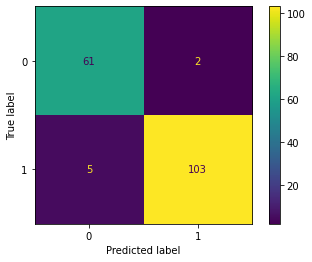

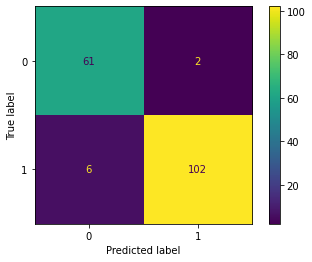

In [2]:
ConfusionMatrixDisplay,
# code
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
clf1 = svm.SVC(kernel='linear')
clf2  = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)

clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)

#Task 2. 

*   1.1.	Perform SVM algorithm to **Iris dataset** using **linear kernel**.
*   1.2.	Compare the obtained results in 1.1 with SVM using other kernels (**Polynomial Kernel, Gaussian Kernel, Sigmoid Kernel, Radial Basis Function Kernel**). Some metrics could be used: accuracy, precision, recall, f1 measures





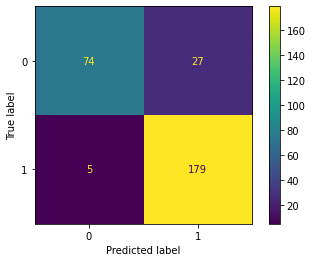

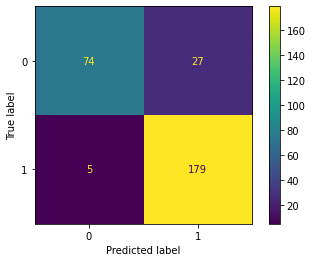

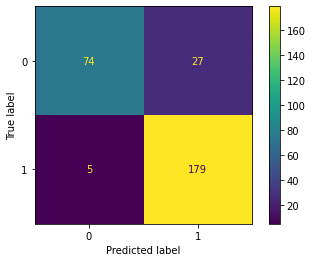

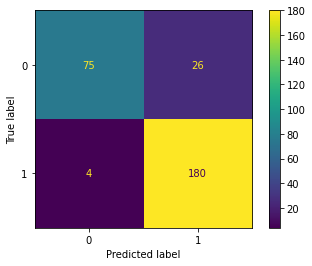

In [3]:
# code
iris = datasets.load_iris()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

clfLin = svm.SVC(kernel='linear')
clfLin.fit(X_train, y_train)
y_predLin = clfLin.predict(X_test)


clfPoly = svm.SVC(kernel='poly', degree=3)
clfPoly.fit(X_train, y_train)
y_predPoly = clfPoly.predict(X_test)


clfSig = svm.SVC(kernel='sigmoid')
clfSig.fit(X_train, y_train)
y_predSig = clfPoly.predict(X_test)


clfRbf = svm.SVC(kernel='rbf')
clfRbf.fit(X_train, y_train)
y_predRbf = clfRbf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_predLin, y_predSig)
ConfusionMatrixDisplay.from_predictions(y_predLin, y_predPoly)
ConfusionMatrixDisplay.from_predictions(y_predLin, y_predSig)
ConfusionMatrixDisplay.from_predictions(y_predLin, y_predRbf)



#Task 3. 
Compare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression) and SVM (using different kernels) with mnist dataset based on accuracy, precision, recall, f1 measures.


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+-----------+--------------------+--------------------+
|    Type   | LogisticRegression |        SVM         |
+-----------+--------------------+--------------------+
|  accuracy | 0.9543937708565072 | 0.967741935483871  |
| precision | 0.9550134981218645 | 0.9676892137343135 |
|   recall  | 0.9543937708565072 | 0.967741935483871  |
|     f1    | 0.9542627387807646 | 0.9675008072872435 |
+-----------+--------------------+--------------------+


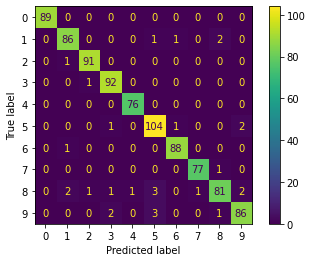

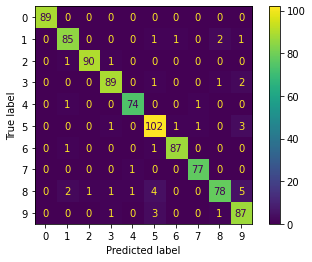

In [7]:
mnist = datasets.load_digits()
X = mnist.data
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

clfMnist = svm.SVC(kernel='linear')
clfMnist.fit(X_train, y_train)
y_predMnist = clfMnist.predict(X_test)

accuracySVM = accuracy_score(y_test, y_predMnist)
precisionSVM = precision_score(y_test, y_predMnist, average='weighted')
recallSVM = recall_score(y_test, y_predMnist, average='weighted')
f1SVM = f1_score(y_test, y_predMnist, average='weighted')

logis = LogisticRegression()
logis.fit(X_train,y_train)
y_predLogis = logis.predict(X_test)

accuracyLogis = accuracy_score(y_test, y_predLogis)
precisionLogis = precision_score(y_test, y_predLogis, average='weighted')
recallLogis = recall_score(y_test, y_predLogis, average='weighted')
f1Logis = f1_score(y_test, y_predLogis, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_test, y_predMnist)
ConfusionMatrixDisplay.from_predictions(y_test, y_predLogis)

t = PrettyTable(['Type', 'LogisticRegression', 'SVM'])
t.add_row(['accuracy', accuracyLogis, accuracySVM])
t.add_row(['precision', precisionLogis, precisionSVM])
t.add_row(['recall', recallLogis, recallSVM])
t.add_row(['f1', f1Logis, f1SVM])
print(t)

#Task 4. 
Compare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression) and SVM (using different kernels) with **credit card dataset** based on accuracy, precision, recall, f1 measures.

*   Give some comments on the obtained results
*   Identify issues with dataset, and propose the solutions to these issues



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+-----------+--------------------+--------------------+
|    Type   | LogisticRegression |        SVM         |
+-----------+--------------------+--------------------+
|  accuracy | 0.9543937708565072 | 0.967741935483871  |
| precision | 0.9550134981218645 | 0.9676892137343135 |
|   recall  | 0.9543937708565072 | 0.967741935483871  |
|     f1    | 0.9542627387807646 | 0.9675008072872435 |
+-----------+--------------------+--------------------+


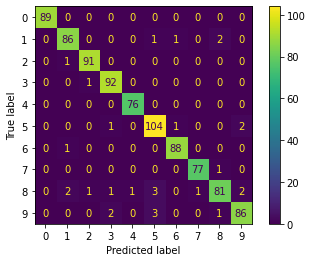

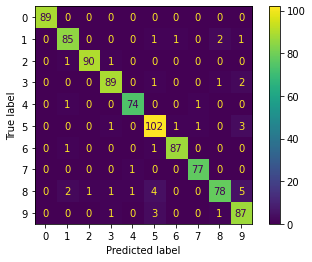

In [8]:
# code
credit = pd.read_csv("creditcard.csv")
X = mnist.data
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

clfMnist = svm.SVC(kernel='linear')
clfMnist.fit(X_train, y_train)
y_predMnist = clfMnist.predict(X_test)

accuracySVM = accuracy_score(y_test, y_predMnist)
precisionSVM = precision_score(y_test, y_predMnist, average='weighted')
recallSVM = recall_score(y_test, y_predMnist, average='weighted')
f1SVM = f1_score(y_test, y_predMnist, average='weighted')

logis = LogisticRegression()
logis.fit(X_train,y_train)
y_predLogis = logis.predict(X_test)

accuracyLogis = accuracy_score(y_test, y_predLogis)
precisionLogis = precision_score(y_test, y_predLogis, average='weighted')
recallLogis = recall_score(y_test, y_predLogis, average='weighted')
f1Logis = f1_score(y_test, y_predLogis, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_test, y_predMnist)
ConfusionMatrixDisplay.from_predictions(y_test, y_predLogis)

t = PrettyTable(['Type', 'LogisticRegression', 'SVM'])
t.add_row(['accuracy', accuracyLogis, accuracySVM])
t.add_row(['precision', precisionLogis, precisionSVM])
t.add_row(['recall', recallLogis, recallSVM])
t.add_row(['f1', f1Logis, f1SVM])
print(t)

#Finally,
Save a copy in your Github. Remember renaming the notebook.